# Pair Programming Estadística III

Vamos ahora a tomar de nuevo el conjunto de datos con el que estuvimos trabajando en los últimos días y vamos a continuar con el análisis de las estadísitcas de los contenidos del conjunto de datos.
Para todas los ejercicios de pair programming de Estadística I, II y III usaremos el dataframe que se tome para el desarrollo de este ejercicio de pair programming.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew
from pydataset import data
import matplotlib.pyplot as plt

1. Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:
- Tabla de contingencia
- Coeficiente de correlación de las variables numéricas del dataset.
- Sesgos de alguna de las variables numéricas del dataset.
- Intervalo de confianza de algunas de las variables numéricas del dataset

In [3]:
df_risk = pd.read_csv("files/world_risk_index.csv", index_col=0)
df_risk.head(2)

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
Region,,,,,,,,,,,
Vanuatu,32.00,56.33,56.81,37.14,79.34,53.96,2011,Very High,Very High,High,High
Tonga,29.08,56.04,51.90,28.94,81.80,44.97,2011,Very High,Very High,Medium,Medium


In [4]:
columnas_min = {col:col.lower().strip().replace(" ","_") for col in df_risk.columns}
df_risk.rename(columns = columnas_min, inplace=True)

In [5]:
df_risk.describe(include = 'object')

,exposure_category,wri_category,vulnerability_category,susceptibility_category
count,1917,1916,1913,1917
unique,5,5,5,5
top,Very Low,Very Low,Very Low,Very Low
freq,393,393,386,390


## Tabla de contingencia

In [6]:
df_risk_crosstab = pd.crosstab(df_risk['exposure_category'], 
                            df_risk['vulnerability_category'], margins = True) 
df_risk_crosstab

vulnerability_category,High,Low,Medium,Very High,Very Low,All
exposure_category,,,,,,
High,53,59,96,122,49,379
Low,60,76,49,76,118,379
Medium,65,54,86,122,53,380
Very High,143,71,90,43,35,382
Very Low,59,121,63,19,131,393
All,380,381,384,382,386,1913


<AxesSubplot:xlabel='exposure_category', ylabel='count'>

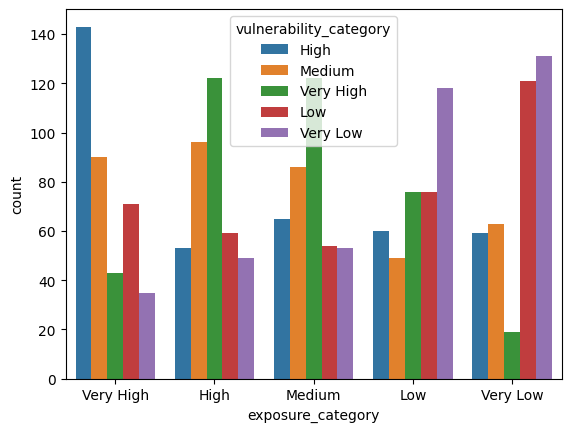

In [7]:
sns.countplot(data = df_risk, x = 'exposure_category', hue = 'vulnerability_category')


Parece que a mayor exposición, mayor vulnerabilidad tiene un país en la mayoría d elos casos (143 regiones). Aunque 161 regiones tienen una exposición elevada y una vulnerabilidad media o baja. Pero ojo, hay valores que se repiten dentro de la categoría regiones.

In [8]:
alta_exposicion = df_risk[(df_risk['exposure_category'] == 'Very High') & (df_risk['vulnerability_category'] == 'Very High') ].reset_index()
alta_exposicion['Region'].size

43

In [9]:
alta_exposicion['Region'].value_counts()

Papua-Neuguinea     8
Guinea-Bissau       8
Timor-Leste         4
Komoren             3
Haiti               3
Kamerun             3
Salomonen           2
Bangladesch         2
Solomon Islands     2
Papua New Guinea    2
Madagaskar          1
Afghanistan         1
Niger               1
Nigeria             1
Gambia              1
Dschibuti           1
Name: Region, dtype: int64

In [10]:
df_risk.head(1)

,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year,exposure_category,wri_category,vulnerability_category,susceptibility_category
Region,,,,,,,,,,,
Vanuatu,32.0,56.33,56.81,37.14,79.34,53.96,2011,Very High,Very High,High,High


## Coeficiente de correlación

In [11]:
matriz_correlacion =  df_risk.corr()
matriz_correlacion

,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year
wri,1.000000,0.917621,0.442428,0.381190,0.455432,0.413275,0.026040
exposure,0.917621,1.000000,0.104787,0.066020,0.145526,0.087737,0.062133
vulnerability,0.442428,0.104787,1.000000,0.932919,0.931140,0.945389,-0.082364
susceptibility,0.381190,0.066020,0.932919,1.000000,0.781126,0.837977,-0.055962
lack_of_coping_capabilities,0.455432,0.145526,0.931140,0.781126,1.000000,0.833061,0.038186
lack_of_adaptive_capacities,0.413275,0.087737,0.945389,0.837977,0.833061,1.000000,-0.230083
year,0.026040,0.062133,-0.082364,-0.055962,0.038186,-0.230083,1.000000


Todas las relaciones son directamente proporcionales. Los coeficientes de correlación más significativos son:
- Aquel dado por 'exposure' y 'wri', 0,917: es decir, los países con más riesgo a peligros naturales tienen una puntuación de riesgo mundial más alto y viceversa. 
- Aquel dado por 'vulnerability' y 'susceptibility', 0,932: es decir, las regiones que corren risgo de tener unas condiciones económicas, de infrustratucturas, etc, más precarias son también aquellos con más riesgo de agravar estas condiciones.
-  También se correlacionan 'vulnerability' con 'lack_of_coping_capabilities', con un coeficiente de 0,9311: por lo que las regiones más vulnerables son las que menos capacidad de gestión (gestion gubernamental, falta de hospitales, servicios emergencia, alerta temprana etc) tienen.
- Por último, 'vulnerability' tiene correlación con 'lack_of_adaptive_capacities', 0,9: las regiones más vulnerabls tienen menos capacidades adaptativas, es decir, menor capacidad de adaptacion a los fenómenos naturales y de cambio climático.


<AxesSubplot:>

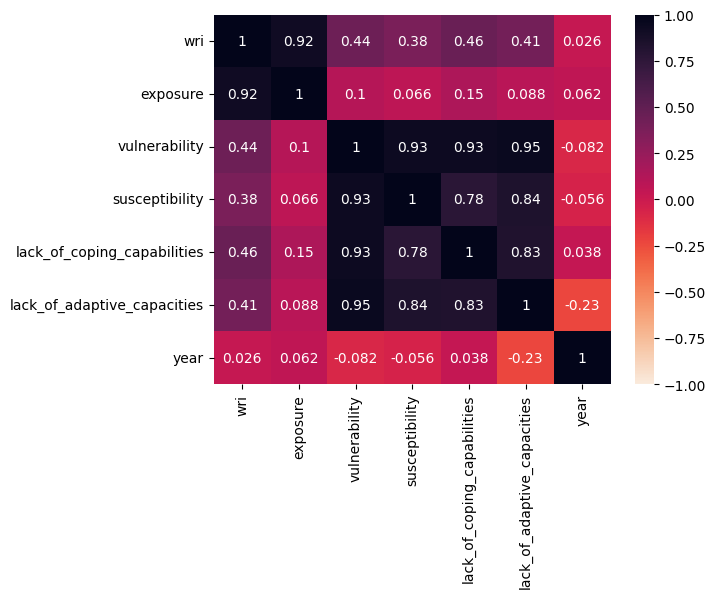

In [12]:
sns.heatmap(df_risk.corr(), cmap= 'rocket_r', annot = True, vmin = -1, vmax = 1)

## Sesgos de alguna de las variables numéricas del dataset

<Figure size 1500x1000 with 0 Axes>

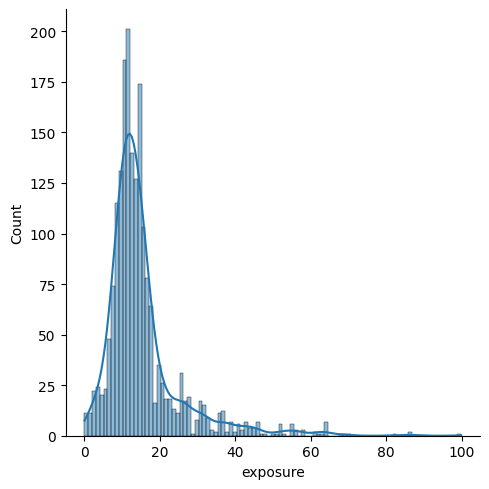

In [13]:
plt.figure(figsize = (15,10))
sns.displot(df_risk['exposure'], color = 'tab:blue', kde = True)
plt.show()

In [14]:
skewness = skew(df_risk['exposure'])
print(f"El valor del sesgo para la variable exposure es: {skewness}")

El valor del sesgo para la variable exposure es: 2.7550733318898852


El valor del sesgo es positivo y nuestros datos para la columna exposure tienen un sesgo a la derecha.

<Figure size 1500x1000 with 0 Axes>

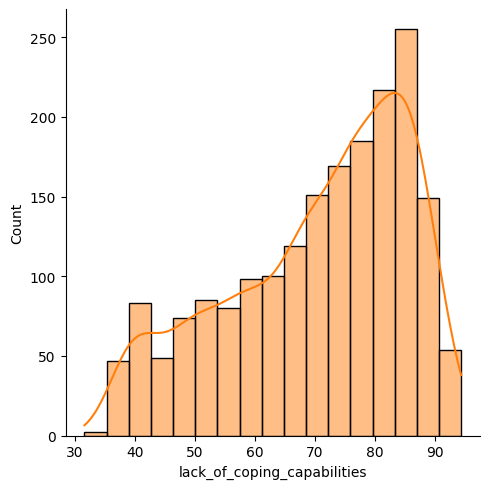

In [15]:
plt.figure(figsize = (15,10))
sns.displot(df_risk['lack_of_coping_capabilities'], color = 'tab:orange', kde = True)
plt.show()

In [26]:
skewness = skew(df_risk['lack_of_coping_capabilities'])
print(f"El valor del sesgo para la variable lack_of_coping_capabilities es: {skewness}")

El valor del sesgo para la variable lack_of_coping_capabilities es: -0.6140122516645456


## Intervalo confianza

In [21]:
import scipy.stats as st

# Queremos realizar el calculo de confianza para la media de vulnerability
datos = df_risk['vulnerability']

# Utilizamos Scipy para calcular el intervalo de confianza del 95% de la media de los datos.
# Dicho intervalo nos indica donde está la media de los valores de longitud de los sépalos con un 95 de probabilidad.
print(st.t.interval(alpha=0.95, df=len(datos)-1, loc=np.mean(datos), scale=st.sem(datos)))

# Lo comparamos con la media obtenido de los datos disponibles hasta el momento
print(f"El valor de la media es: {np.mean(datos)}")

(47.45601613379751, 48.69550186307243)
El valor de la media es: 48.07575899843497


/tmp/ipykernel_1040/1624203487.py:8: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  print(st.t.interval(alpha=0.95, df=len(datos)-1, loc=np.mean(datos), scale=st.sem(datos)))


Esto sugiere que la media de la vulnerabilidad del total de las regiones se encuentra en un rango entre 47.45 y 48.69, con un nivel de confianza del 95%.

<AxesSubplot:xlabel='vulnerability', ylabel='exposure'>

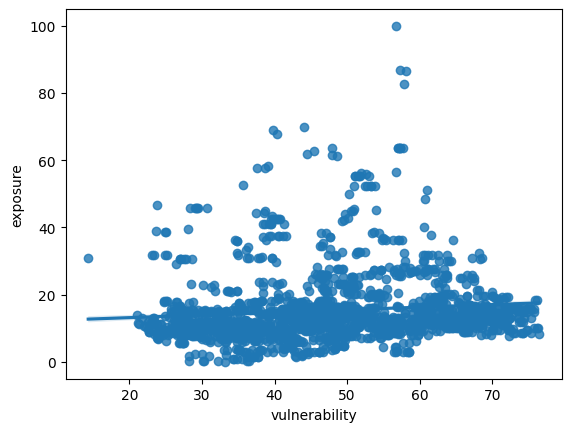

In [24]:
sns.regplot("vulnerability","exposure" , data=df_risk)

Que la exposición al riesgo es baja en la mayoría de las regiones, sin embargo, la vulnerabilidad varía mucho. Por lo que podría suponer que los países no disponen de mecanismos para gestionar la vulnerabilidad.

/home/ximenaptm/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vulnerability', ylabel='susceptibility'>

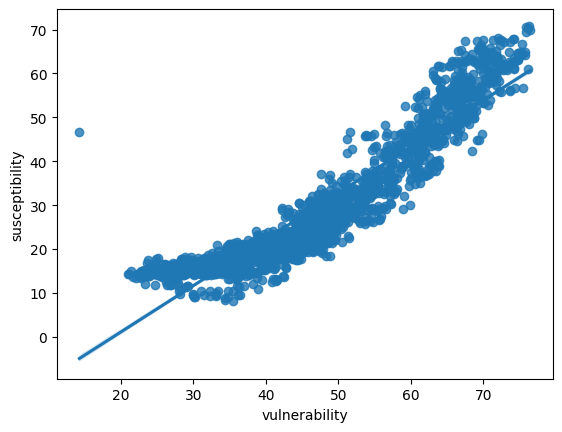

In [25]:
sns.regplot("vulnerability","susceptibility" , data=df_risk)

Las regiones más vulnerables son los más susceptibles y viceversa. Existe un caso que requiere revisión ya que que siendo una región que tiene una baja vulnerabilidad, tiene más susceptibilidad.

## 2. Interpretación de los resultados.
Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.

## Tabla de contingencia

La tabla de contingencia para las variables 'Categoría de exposición' y 'Categoría de vulnerabilidad', indica que a mayor exposición, mayor vulnerabilidad.  

143 regiones tiene una exposición muy alta y una vulnerabilida alta, siendo la frecuencia con más casos. Mientras que 35 regiones tienen una exposición elevada y una vulnerabilidad baja, lo que podría reflejar una capacidad para gestionar el riesgo. 

Se debe considerar que hay valores que se repiten dentro de la categoría regiones.

## Coeficiente de correlación

Todas las relaciones son directamente proporcionales. Los coeficientes de correlación más significativos son:
- Aquel dado por 'exposure' y 'wri', 0,917: es decir, los países con más riesgo a peligros naturales tienen una puntuación de riesgo mundial más alto y viceversa. 
- Aquel dado por 'vulnerability' y 'susceptibility', 0,932: es decir, las regiones que corren risgo de tener unas condiciones económicas, de infrustratucturas, etc, más precarias son también aquellos con más riesgo de agravar estas condiciones.
-  También se correlacionan 'vulnerability' con 'lack_of_coping_capabilities', con un coeficiente de 0,9311: por lo que las regiones más vulnerables son las que menos capacidad de gestión (gestion gubernamental, falta de hospitales, servicios emergencia, alerta temprana etc) tienen.
- Por último, 'vulnerability' tiene correlación con 'lack_of_adaptive_capacities', 0,9: las regiones más vulnerabls tienen menos capacidades adaptativas, es decir, menor capacidad de adaptacion a los fenómenos naturales y de cambio climático.


## Sesgo

La variable exposición tiene un  sesgo positivo, es decir,  nuestros datos para la columna exposure tienen un sesgo a la derecha. Indica que existen varias regiones con exposición mayor a la media.

El valor del sesgo para la variable lack_of_coping_capabilities es -0.614. Esto indica un sesgo negativo, es decir, hacia la izquierda. Siendo que hay más valores distintos a la izquierda, o menores a la media.

## Intervalo confianza

Esto sugiere que la media de la variable vulnerabilidad para el total de las regiones, se encuentra en un rango entre 47.45 y 48.69, con un nivel de confianza del 95%.

Con base a la gráfica, se considera que los datos apuntan a que la exposición al riesgo es baja en la mayoría de las regiones, sin embargo, la vulnerabilidad varía mucho. Por lo que podría suponer que los países no disponen de mecanismos para gestionar la vulnerabilidad.

Al relacionar la vulnerabilidad y suceptibilidad de las regiones, se muestra que las regiones más vulnerables son las más susceptibles y viceversa. Existe un caso que requiere revisión ya que que siendo una región que tiene una baja vulnerabilidad, tiene más susceptibilidad.